In [36]:
### Title: Week 4 Individual Coding Assignment by Maya Coronado 
### Data Source: LA Geo Hub Median Income 2022 Data
### Updating and revising my intial Week 3 file for Week 4 assignment with additional charts and statistics. 
### Description: I will be looking at census tract data in LA County for median household income
### to understand the financial wellbeing of residents and identify wealth disparities through maps and graphs. 

In [ ]:
# I am choosing to redo assigment 3 but focusing on SPAs as we will be focusing on them for the group project. 
# This can advance our team's discussions and focal points. 

In [6]:
# Importing panda, business as usual. 

In [2]:
import pandas as pd

In [3]:
# Re-loading the data flie. 
w4 = pd.read_csv('Median_Income_and_AMI_(census_tract).csv')

In [9]:
# Looking at data size to double check it's loaded in properly.

In [4]:
w4.shape

(2495, 13)

In [12]:
# Running the head command. Again, I won't use set_option as it's relatively large. 

In [5]:
w4.head

<bound method NDFrame.head of            tract  med_hh_income  med_hh_income_universe  \
0     6037199700        38892.0                    1204   
1     6037199801        41027.0                     903   
2     6037199802        42500.0                     612   
3     6037199900        37232.0                     845   
4     6037201110        65000.0                     782   
...          ...            ...                     ...   
2490  6037554516       126450.0                    1215   
2491  6037554517       107672.0                    1352   
2492  6037554518       104439.0                    1558   
2493  6037554519       131012.0                    1216   
2494  6037554521        90280.0                    1863   

               ami_category below_med_income below_60pct_med_income  \
0           Very Low Income              Yes                    Yes   
1           Very Low Income              Yes                    Yes   
2           Very Low Income              Yes    

In [14]:
# Gotta double check that we have no missing data. 

In [6]:
w4.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tract                   2495 non-null   int64  
 1   med_hh_income           2458 non-null   float64
 2   med_hh_income_universe  2495 non-null   int64  
 3   ami_category            2458 non-null   object 
 4   below_med_income        2458 non-null   object 
 5   below_60pct_med_income  2458 non-null   object 
 6   below_moderate_income   2458 non-null   object 
 7   sup_dist                2495 non-null   object 
 8   csa                     2495 non-null   object 
 9   spa                     2495 non-null   object 
 10  ESRI_OID                2495 non-null   int64  
 11  Shape__Area             2495 non-null   float64
 12  Shape__Length           2495 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 253.5+ KB


In [37]:
# No "null" so we don't have any missing data, which is nice. 

In [16]:
#Here's the code for leading zeros as we'll need those. 

In [7]:
w4 = pd.read_csv(
    'Median_Income_and_AMI_(census_tract).csv',
    dtype=
    {
        'tract':str
    
    }
)

In [38]:
# Checking that I input the data correctly by using the "head" function.

In [8]:
w4.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636


In [40]:
# Boom, works again. Also, I will be leaving my column names as is. 
# They're pretty descriptive already. 

In [9]:
w4['med_hh_income'].head()

0    38892.0
1    41027.0
2    42500.0
3    37232.0
4    65000.0
Name: med_hh_income, dtype: float64

In [22]:
# It's nice to have the mean so I'll write that up to. 

In [10]:
w4['med_hh_income'].mean()

76849.3344182262

In [24]:
# Sorting the data by median household income to identify the highest median income. 

In [11]:
w4_sorted = w4.sort_values(by='med_hh_income', ascending = False)

In [12]:
# Here's a handful of tracts to show which SPAs have the highest median income.

In [12]:
w4_sorted[['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
1303,250001.0,SPA 5 - West
1308,250001.0,SPA 5 - West
1930,250001.0,SPA 2 - San Fernando
1307,250001.0,SPA 5 - West
2090,250001.0,SPA 5 - West
1196,250000.0,SPA 8 - South Bay
1309,246750.0,SPA 5 - West
1384,236709.0,SPA 2 - San Fernando
1305,231188.0,SPA 5 - West
2375,228836.0,SPA 4 - Metro


In [13]:
# Overwhelmingly, SPA 5 is the higest. This doesn't surprise me as Beverly Hills and Malibu are part of this SPA. 

In [14]:
# I'll run the command to show the SPAs with the lowest median income.

In [13]:
w4_sorted = w4.sort_values(by='med_hh_income', ascending = True)

In [17]:
# And here's what it look like when I want to display it.

In [14]:
w4_sorted[['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
138,4918.0,SPA 4 - Metro
137,7193.0,SPA 4 - Metro
771,9722.0,SPA 6 - South
136,11153.0,SPA 4 - Metro
143,11430.0,SPA 4 - Metro
146,12283.0,SPA 4 - Metro
135,12344.0,SPA 4 - Metro
624,13630.0,SPA 6 - South
1461,15417.0,SPA 5 - West
766,16471.0,SPA 4 - Metro


In [19]:
# SPA 4 dominates this list with incomes well below the FPL. 
# It would be good to include this SPA in my midterm analysis. 

In [24]:
# I want to see which SPAs represent the 20 lowest median household incomes.
# This can direct my team to which SPAs may have a severe financial barrier to healthy, affordable food. 

<Axes: title={'center': 'Lowest Median Household Incomes by SPA in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

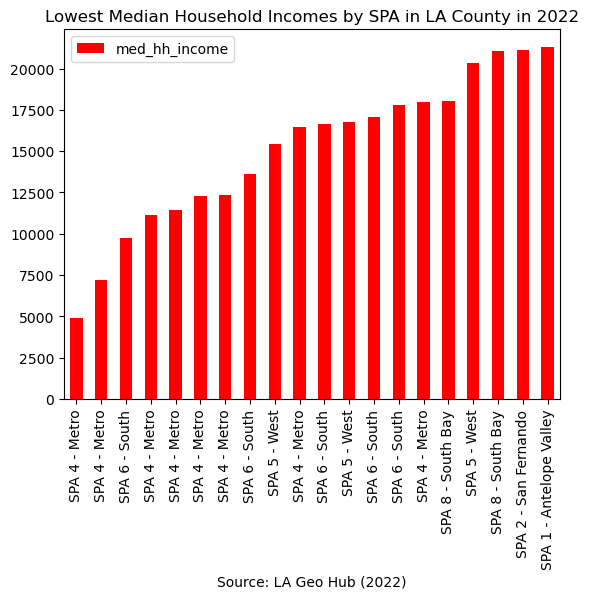

In [15]:
w4_sorted.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Lowest Median Household Incomes by SPA in LA County in 2022',
                             color='red',
                            xlabel='Source: LA Geo Hub (2022)')

In [ ]:
# Again, we see SPA 4 recurring quite a bit on this list. SPA 6 also pops up a few times.

In [25]:
# Comparing highest with the lowest SPAs could help us identify how severe the income inequality.
# I'll go ahead and code the highest earning SPAs. It'll likley be a lot of SPA 5. 

In [16]:
w4_high = w4.sort_values (by='med_hh_income', ascending = False)

In [17]:
w4_high[['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
1303,250001.0,SPA 5 - West
1308,250001.0,SPA 5 - West
1930,250001.0,SPA 2 - San Fernando
1307,250001.0,SPA 5 - West
2090,250001.0,SPA 5 - West
1196,250000.0,SPA 8 - South Bay
1309,246750.0,SPA 5 - West
1384,236709.0,SPA 2 - San Fernando
1305,231188.0,SPA 5 - West
2375,228836.0,SPA 4 - Metro


In [29]:
# Again, lots of SPA 5 so that means I'm writing the code correctly. 
# I'll map out the top 20 census tracts by SPA to see which ones come up most frequently.

<Axes: title={'center': 'Highest Median Incomes by SPAs in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

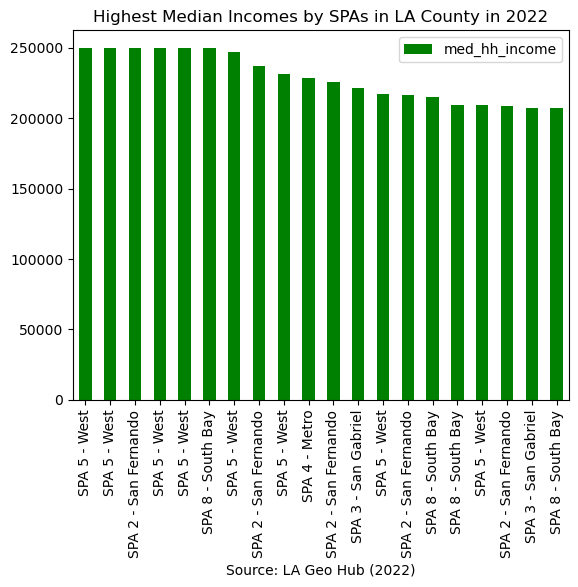

In [18]:
w4_high.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Highest Median Incomes by SPAs in LA County in 2022',
                             color='green',
                            xlabel='Source: LA Geo Hub (2022)')

In [32]:
# Lots of SPA 3, 5, and 8. The census tract with the highest median income in SPA 5 is making 50 times the amount 
# that the lowest census tract in SPA 4 is making.

In [19]:
# I want to run a few additional things prior to mapping out this data. Here's the median. 
w4['med_hh_income'].median()

69698.0

In [20]:
# Some additional handy stats to understand the disparities within LA County.
w4['med_hh_income'].describe()

count      2458.000000
mean      76849.334418
std       35546.132788
min        4918.000000
25%       51157.500000
50%       69698.000000
75%       94515.500000
max      250001.000000
Name: med_hh_income, dtype: float64

In [42]:
# Everything aligns with the previous commands that I've run. 

<Axes: ylabel='Frequency'>

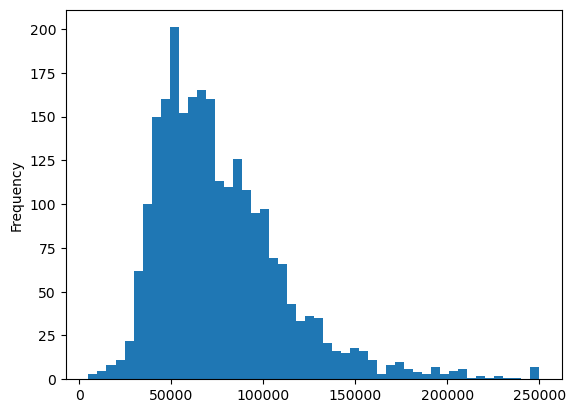

In [21]:
# Here's a histogram of the income layout in the city by frequency.
w4['med_hh_income'].plot.hist(bins=50)

<Axes: title={'center': 'SPAs Displayed by Median Household Income in LA County in 2022'}, xlabel='med_hh_income', ylabel='spa'>

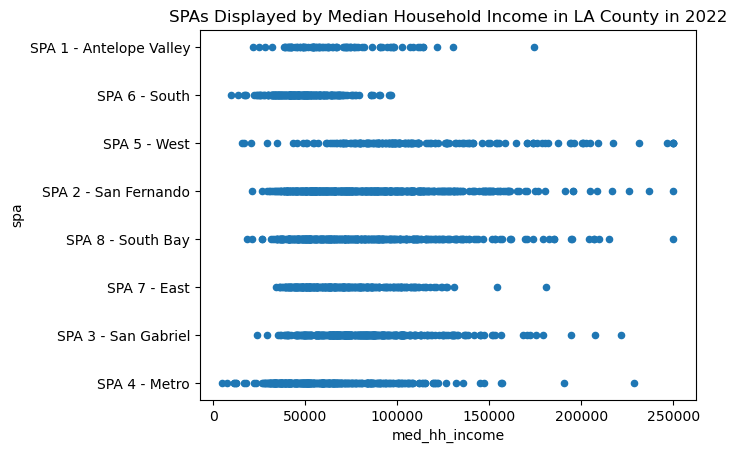

In [43]:
# I think a scatterplot could show where the SPAs stack up against one another by median household income.
w4.plot.scatter(x='med_hh_income', y='spa', title='SPAs Displayed by Median Household Income in LA County in 2022')

In [48]:
# This is actually pretty helpful at describing what I've been seeing in the other charts since they're all lined up by one another. 
# SPA 1 and SPA 6 have especially condensed bars compared to some of the other regions of LA county.

In [ ]:
# To make it easier to read, I'll sort it numerically. I need to sort the values by spa first. 

In [26]:
serviceplanningarea = w4.sort_values (by='spa', ascending = False)

In [31]:
# Now we have to double check that it sorted correctly.

In [29]:
serviceplanningarea.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
1028,06037650604,65712.0,2581,Low Income,Yes,No,Yes,District 4,City of Torrance,SPA 8 - South Bay,3375,5.553366e+06,9486.173658
355,06037575300,40303.0,1250,Very Low Income,Yes,Yes,Yes,District 4,City of Long Beach,SPA 8 - South Bay,2702,6.978915e+06,10568.239937
353,06037575201,49094.0,1239,Very Low Income,Yes,No,Yes,District 4,City of Long Beach,SPA 8 - South Bay,2700,6.099629e+06,10556.721385
352,06037575103,52748.0,2090,Very Low Income,Yes,No,Yes,District 4,City of Long Beach,SPA 8 - South Bay,2699,5.172366e+06,9179.183563
351,06037575102,35927.0,1287,Very Low Income,Yes,Yes,Yes,District 4,City of Long Beach,SPA 8 - South Bay,2698,4.364865e+06,9257.548286


In [32]:
# Looks like it is as I see 8, which is the final SPA in LA County.

<Axes: title={'center': 'SPAs Displayed Numerically by Median Household Income in LA County in 2022'}, xlabel='med_hh_income', ylabel='spa'>

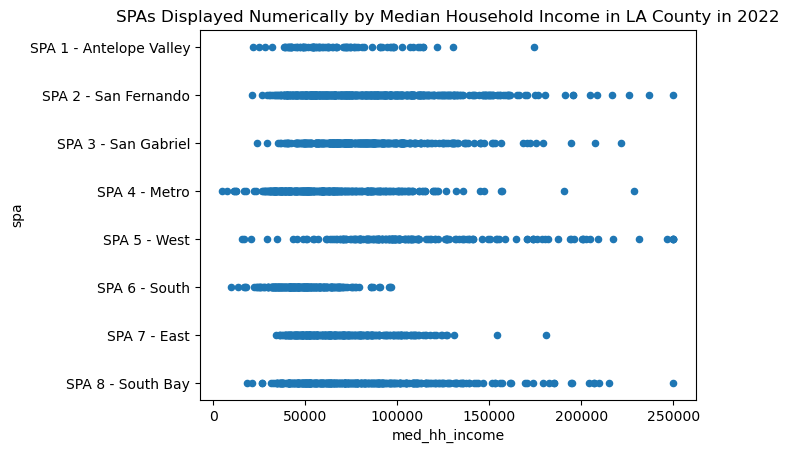

In [45]:
# I think a scatterplot could show where the SPAs stack up against one another by median household income.
serviceplanningarea.plot.scatter(x='med_hh_income', y='spa', title='SPAs Displayed Numerically by Median Household Income in LA County in 2022')

In [33]:
# It's a little easier to digest with the SPAs  on the lefthand side. Again, SPAs 1 and 6 have a smaller range than the others. 

In [33]:
# I want to map out some of this data. So I'll need to import geopandas and read the data file properly.

In [49]:
import geopandas as gpd

In [50]:
map=gpd.read_file('Census_Tracts_2020.geojson')
map.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [51]:
# Now subsetting to show the data per row. 

In [52]:
map = map[['CT20','geometry']]
map.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [53]:
# I need to put in a tract column.
# CA=06 and LA County=037
map['tract'] ='06' + '037' + map ['CT20']

In [54]:
# Double checking that I performed this function correctly.

In [55]:
map.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [56]:
# So far looks to be working, now I have to merge the data. 

In [57]:
both=map.merge(w4,on="tract")

In [46]:
# Need to double check that it merged correctly, so I'll run the head statement again.

In [58]:
both.head()

,CT20,geometry,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,74625.0,1505,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2736,1.232981e+07,14765.649004
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,93125.0,1341,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2737,2.908866e+07,30028.213771
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,55682.0,1430,Very Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2738,7.532651e+06,12504.552130
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,46274.0,1513,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2739,3.874399e+06,8938.421349
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,30016.0,969,Extremely Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2740,3.090538e+06,9750.960420


<Axes: >

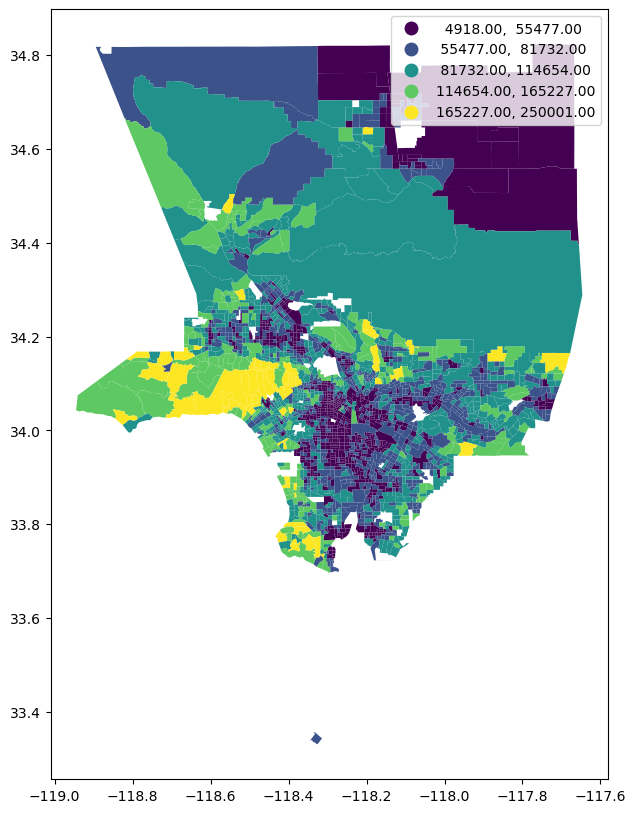

In [59]:
both.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='NaturalBreaks')


In [ ]:
# This chart matches with my expectations based on all the previous graphs that I've run. Higher incomes are situated along the coastal regions of LA.
# Lower income tracts settle near the middle of Los Angeles.

In [66]:
# This concludes assignment 4.